In [10]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from pathlib import Path
home = str(Path.home())
import sys
sys.path.append(home+"/tmp/my_utils/src/")
from plot import contour
import cartopy.io.shapereader as shpreader

https://www.guillaumedueymes.com/post/shapefiles_country/

In [6]:
fid = xr.open_dataset(home+"/tmp/GPCP_v2.3_1979_2019.nc")
data = fid['precip']
lat = fid['latitude']
lon = fid['longitude']

In [32]:
shpfilename = shpreader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')

reader = shpreader.Reader(shpfilename)
countries = reader.records()
country = next(countries)
#print(sorted(country.attributes.keys()))
#print(country.attributes['POP_EST'])

#population = lambda country: country.attributes['POP_EST']
#countries_by_pop = sorted(reader.records(), key=population)[:5]

adm1_shapes = list(shpreader.Reader('geomap/gadm41_CHN_0.shp').geometries())
#china = shpreader.Reader('geomap/gadm41_CHN_0.shp').geometries()



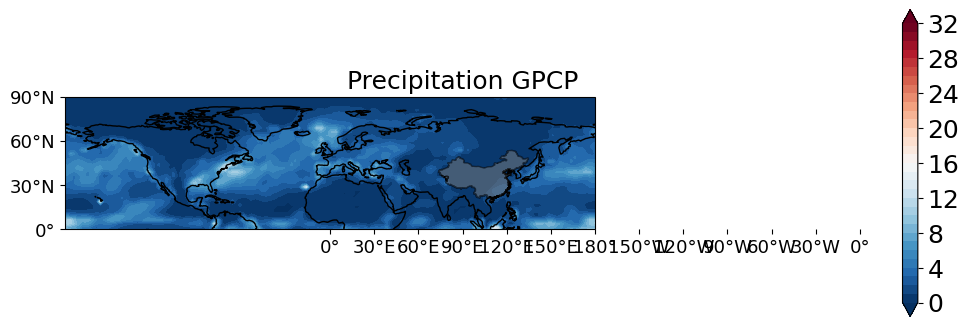

In [38]:
crange = np.arange(0,32.01,1)
lat_rgns = [0, 90]
lon_rgns = [0, 360]

fig, axes = plt.subplots(1,1,figsize=(11,8.5),subplot_kw={'projection':  ccrs.PlateCarree()},squeeze=False)
#axes[0][0].add_geometries(adm1_shapes,ccrs.PlateCarree(),edgecolor='black', facecolor='gray', alpha=0.5)

contour.plot_2d_contourf_PlateCarree(fig, axes[0][0], data[0,:,:], lat, lon, lat_rgns, lon_rgns,
                                         "Precipitation GPCP",'',crange,cmap="RdBu_r")

axes[0][0].add_geometries(adm1_shapes,ccrs.PlateCarree(),edgecolor='black', facecolor='gray', alpha=0.5)


(<Figure size 1100x850 with 2 Axes>,
 <GeoAxesSubplot: title={'center': 'Precipitation GPCP'}>)

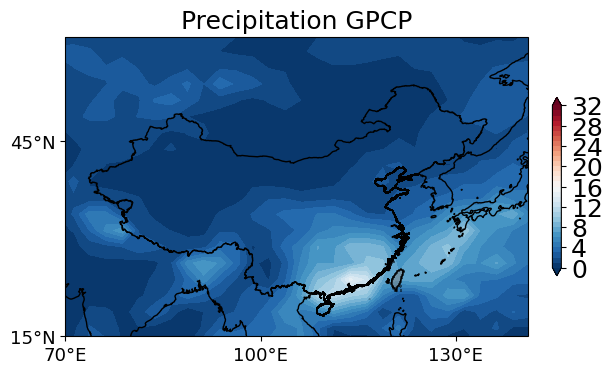

In [82]:

adm1_shapes = list(shpreader.Reader('geomap/gadm41_CHN_0.shp').geometries())
adm2_shapes = list(shpreader.Reader('geomap/gadm41_TWN_0.shp').geometries())

ax = plt.axes(projection=ccrs.PlateCarree())

plt.title('China')
#ax.coastlines(resolution='10m')

ax.add_geometries(adm1_shapes, ccrs.PlateCarree(),
                  edgecolor='k', facecolor='none',linewidth=1)
ax.add_geometries(adm2_shapes, ccrs.PlateCarree(),
                  edgecolor='black', facecolor='gray', alpha=0.5)

ax.set_extent([70, 140, 15, 60], ccrs.PlateCarree())

crange = np.arange(0,32.01,1)
lat_rgns = [15, 60]
lon_rgns = [70, 140]
contour.plot_2d_contourf_PlateCarree(fig, ax, data[100,:,:], lat, lon, lat_rgns, lon_rgns,
                                         "Precipitation GPCP",'',crange,cmap="RdBu_r")


In [76]:
from cartopy.io import shapereader
import numpy as np
import matplotlib.pyplot as plt

import cartopy.crs as ccrs

# get natural earth data (http://www.naturalearthdata.com/)

# get country borders
resolution = '10m'
category = 'cultural'
name = 'admin_0_countries'

shpfilename = shapereader.natural_earth(resolution, category, name)

# read the shapefile using geopandas
df = geopandas.read_file(shpfilename)

# read the german borders
poly = df.loc[df['ADMIN'] == 'Germany']['geometry'].values[0]

ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_geometries(poly, crs=ccrs.PlateCarree(), facecolor='none', 
                  edgecolor='0.5')

ax.set_extent([5, 16, 46.5, 56], crs=ccrs.PlateCarree())

/Users/zhangtao/soft/miniconda3/envs/dushu/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_countries.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


NameError: name 'geopandas' is not defined